In [5]:
import pandas as pd;
import random;
from statistics import fmean, stdev;
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import DistanceMetric
from sklearn.ensemble import RandomForestClassifier

In [6]:

df = pd.read_csv("./Data/GeneratedSyntheticData-NosielessInformativeEasy.csv")

columns = df.columns.to_list()
columns_drop = columns.pop(-1)

#drop NaN rows, could implement imputer as well
df.dropna(inplace=True)

labels = df.drop(columns, axis=1)

#df= df.drop("5", axis=1)
#df= df.drop("Unnamed: 0", axis=1)

df

,0,1,2,3,4,5
0,-4.539317,5.021729,-7.042357,-7.428090,4.943687,0.0
1,4.300671,6.131065,-6.394796,-5.981102,4.579452,1.0
2,-5.004336,4.473384,-6.048647,-5.556982,4.051438,0.0
3,2.732848,7.791876,-7.495527,-6.541127,3.910933,1.0
4,-4.193859,5.393440,-5.317542,-5.605152,4.807354,0.0
...,...,...,...,...,...,...
295,5.349610,4.226061,-4.841005,-6.342083,4.820905,1.0
296,-5.247255,5.149173,-6.669314,-5.848687,3.793496,0.0
297,3.308685,5.513754,-3.805559,-5.564981,4.670373,1.0
298,-4.510472,4.712267,-4.550419,-3.915542,4.798225,0.0


In [7]:
#import functions from python file once it's complete

# get_bounds(df)

# for col in df:
#     print(f"the range of col {col} is {df[col].min()} - {df[col].max()} ")

# create1 = Creation(df,10000,['5'], weightingFunction='uniform')
# pop1 = create1[0]
# columns1 = pop1.columns.to_list()
# columns1_drop = columns1.pop(-1)

# labels1 = pop1.drop(columns1, axis=1)
# pop1 = pop1.drop(columns1_drop, axis=1)
# f, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(20,8))
# sns.scatterplot(pop1[:,0],pop1[:,1],ax=ax1)

In [8]:
dbscan_df = pd.read_csv("./Data/GeneratedSyntheticData-NosiyEasy.csv")

ss = StandardScaler()
dbscan_df = ss.fit_transform(dbscan_df)
dbs = DBSCAN(eps=1, min_samples=4)
dbs.fit(dbscan_df)
labels = dbs.labels_
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_
#y_pred = dbs.fit_predict(dbscan_df)
# plt.scatter(dbscan_df[:,0], dbscan_df[:,1],c=y_pred, cmap='Paired')
# plt.title("DBSCAN")

#f, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(20,8))
#sns.scatterplot(dbscan_df[:,0],dbscan_df[:,1],hue=y_pred,ax=ax1)

5

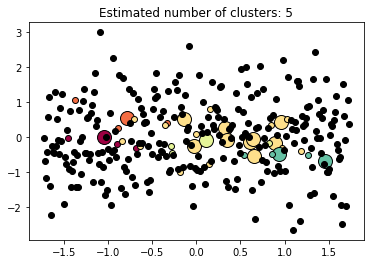

In [9]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = dbscan_df[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = dbscan_df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

/Users/nikhil/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

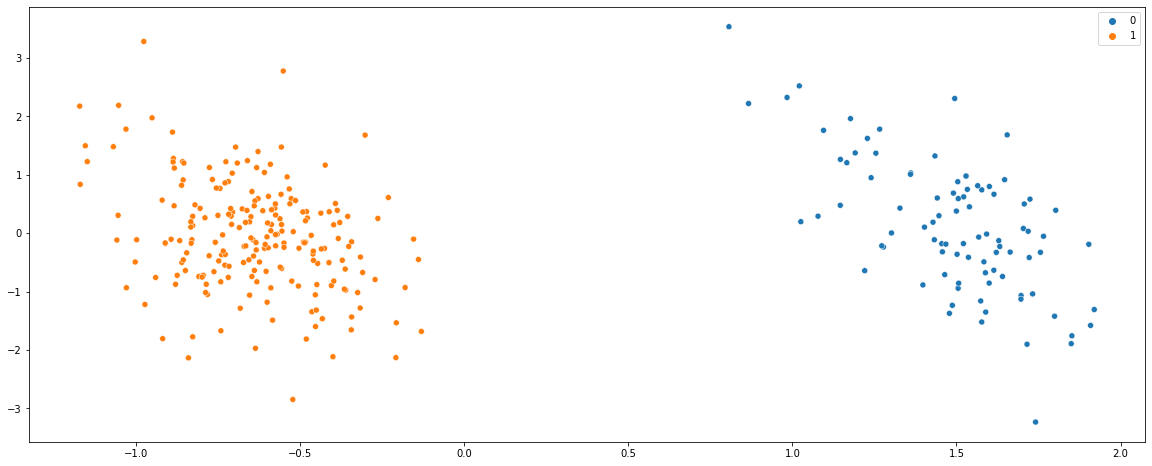

In [10]:
kmeans_df = pd.read_csv("./Data/GeneratedSyntheticData-NosielessInformativeEasy.csv")

ss = StandardScaler()
kmeans_df = ss.fit_transform(kmeans_df)
Kmean = KMeans(n_clusters=2)
Kmean.fit(kmeans_df)
y_pred = Kmean.predict(kmeans_df)
# plt.scatter(kmeans_df[:,0], kmeans_df[:,1],c=y_pred, cmap='Paired')
# plt.title("K-means")

f, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(20,8))
sns.scatterplot(kmeans_df[:,0],kmeans_df[:,1],hue=y_pred,ax=ax1)